### 1. Importe un csv desde internet
Utilice la base de datos de un compañero creada en la sesión pasada.

In [3]:
import pandas as pd
df = pd.read_csv('subsample_ale_demo.csv')

In [4]:
df.head()

Unnamed: 0  undp_hdi ccodealp   ht_region   gle_cgdpc     imf_pop  ffp_hf  \
0          85     0.902      JPN    EastAsia  36123.7700  127.120003     2.6   
1         191     0.702      WSM     Pacific   3167.7500    0.192000     8.9   
2         147     0.720      VCT   Caribbean   7454.8799    0.110000     NaN   
3          74     0.834      HUN  EastEurope  18310.8110    9.877000     3.3   
4         120     0.555      NPL   SouthAsia   1462.0800   28.174999     7.0   

    wef_qes  wdi_expedu   wdi_ners  
0  4.430102     3.59184  99.042671  
1       NaN         NaN  79.545982  
2       NaN         NaN        NaN  
3  3.289020     4.65935  92.195374  
4  3.591811     3.98130  59.679131

### 2. Importe su conjunto de funciones
Genere un archivo *ancilliary_funcs.py* para guardar las funciones creadas en la sesión pasada e impórtelo.
Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [5]:
import ancilliary_funcs as ale

In [6]:
for i in list(df):
    n_casos, porcen = ale.var_per(df, i, False)
    print("La variable '", i, "' tiene", n_casos, "observaciones perdidas (", round(porcen,2),"%).")

La variable ' Unnamed: 0 ' tiene 0 observaciones perdidas ( 0.0 %).
La variable ' undp_hdi ' tiene 4 observaciones perdidas ( 4.12 %).
La variable ' ccodealp ' tiene 0 observaciones perdidas ( 0.0 %).
La variable ' ht_region ' tiene 0 observaciones perdidas ( 0.0 %).
La variable ' gle_cgdpc ' tiene 2 observaciones perdidas ( 2.06 %).
La variable ' imf_pop ' tiene 28 observaciones perdidas ( 28.87 %).
La variable ' ffp_hf ' tiene 9 observaciones perdidas ( 9.28 %).
La variable ' wef_qes ' tiene 25 observaciones perdidas ( 25.77 %).
La variable ' wdi_expedu ' tiene 25 observaciones perdidas ( 25.77 %).
La variable ' wdi_ners ' tiene 35 observaciones perdidas ( 36.08 %).


### 3. Estime el puntaje Z
- Estime el puntaje Z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos
- Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula: .
- Para ordenar los valores pueden utilzar la función *sort_values* del DataFrame analizado. Lean la documentación asociada al argumento *by * para evitar conflictos en la sobreescritura
- Asegúrense de eliminar las observaciones que tengan valores perdidos con *dropna *. Lean la documentación asociada al método *subset *.

Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

In [7]:
# Variables con el menor n° de casos perdidos: 'gle_cgdpc' (y 'undp_hdi')

# Calcular Zscore en columna nueva:
df['Zscore_gle_cgdpc'] = ( df['gle_cgdpc'] - df['gle_cgdpc'].mean() ) / df['gle_cgdpc'].std()
df.head()

Unnamed: 0  undp_hdi ccodealp   ht_region   gle_cgdpc     imf_pop  ffp_hf  \
0          85     0.902      JPN    EastAsia  36123.7700  127.120003     2.6   
1         191     0.702      WSM     Pacific   3167.7500    0.192000     8.9   
2         147     0.720      VCT   Caribbean   7454.8799    0.110000     NaN   
3          74     0.834      HUN  EastEurope  18310.8110    9.877000     3.3   
4         120     0.555      NPL   SouthAsia   1462.0800   28.174999     7.0   

    wef_qes  wdi_expedu   wdi_ners  Zscore_gle_cgdpc  
0  4.430102     3.59184  99.042671          1.188021  
1       NaN         NaN  79.545982         -0.590326  
2       NaN         NaN        NaN         -0.358988  
3  3.289020     4.65935  92.195374          0.226812  
4  3.591811     3.98130  59.679131         -0.682366

In [8]:
#ordenar valores (sort_values) del dataframe por Zscore

df_gle_sorted = df.sort_values(by = ['Zscore_gle_cgdpc'])
df_gle_sorted.head()

Unnamed: 0  undp_hdi ccodealp    ht_region  gle_cgdpc  imf_pop  ffp_hf  \
12          97     0.427      LBR  SubSaharian  488.26999      NaN     6.6   
39         125     0.351      NER  SubSaharian  644.53998      NaN     6.9   
83          26     0.406      BDI  SubSaharian  663.57001      NaN     6.8   
77          32     0.347      CAF  SubSaharian  690.03998      NaN     6.9   
92         102     0.511      MDG  SubSaharian  822.62000      NaN     6.1   

     wef_qes  wdi_expedu   wdi_ners  Zscore_gle_cgdpc  
12  3.472222     2.75756        NaN         -0.734914  
39       NaN     6.70941  15.665040         -0.726482  
83  2.595249     5.41642  24.948179         -0.725455  
77       NaN     1.22393  13.600750         -0.724027  
92  2.968793     2.08204  31.080410         -0.716873

In [9]:
# Eliminar valores perdidos con dropna, check subset
df_gle_sorted_nonan = df_gle_sorted.dropna(subset=['gle_cgdpc'])

df_gle_sorted_nonan.head(10)

Unnamed: 0  undp_hdi ccodealp    ht_region   gle_cgdpc  imf_pop  ffp_hf  \
12          97     0.427      LBR  SubSaharian   488.26999      NaN     6.6   
39         125     0.351      NER  SubSaharian   644.53998      NaN     6.9   
83          26     0.406      BDI  SubSaharian   663.57001      NaN     6.8   
77          32     0.347      CAF  SubSaharian   690.03998      NaN     6.9   
92         102     0.511      MDG  SubSaharian   822.62000      NaN     6.1   
50         116     0.414      MOZ  SubSaharian   852.39001   25.733     7.4   
47          54     0.441      ETH  SubSaharian   900.77002   88.347     7.0   
84         139     0.421      GNB  SubSaharian   961.26001      NaN     8.5   
11         154     0.431      SLE  SubSaharian   979.95001    6.232     8.4   
32         172     0.484      TGO  SubSaharian  1036.28000    6.929     7.3   

     wef_qes  wdi_expedu   wdi_ners  Zscore_gle_cgdpc  
12  3.472222     2.75756        NaN         -0.734914  
39       NaN     6.70941  15.665040         -0.726482  
83  2.595249     5.41642  24.948179         -0.725455  
77       NaN     1.22393  13.600750         -0.724027  
92  2.968793     2.08204  31.080410         -0.716873  
50  2.770460     6.48322  19.439980         -0.715266  
47  3.599252     4.50051  30.274250         -0.712655  
84       NaN     2.17313        NaN         -0.709391  
11  2.986086     2.66167        NaN         -0.708383  
32       NaN     4.86846        NaN         -0.705343

In [10]:
df_gle_sorted_nonan.tail(10)

Unnamed: 0  undp_hdi ccodealp      ht_region   gle_cgdpc    imf_pop  \
89          58     0.893      FIN     WesternDem   36958.211   5.427000   
56           8     0.937      AUS     WesternDem   38611.949  23.621000   
42         167     0.909      SWE     WesternDem   39000.910   9.645000   
80          64     0.924      DEU     WesternDem   39486.699  80.983002   
90         121     0.923      NLD     WesternDem   42258.352  16.865000   
72         148       NaN      SMR     WesternDem   42664.211   0.034000   
70          23     0.864      BRN  SouthEastAsia   46103.840   0.412000   
41         168     0.938      CHE     WesternDem   50454.410   8.140000   
14          99     0.911      LIE     WesternDem  102243.520        NaN   
35         111       NaN      MCO     WesternDem  108481.130        NaN   

    ffp_hf   wef_qes  wdi_expedu   wdi_ners  Zscore_gle_cgdpc  
89     2.3  5.859115     7.16810  94.003181          1.233049  
56     1.0  4.798969     5.22534  87.572853          1.322286  
42     1.5  4.577006     7.67509  96.651558          1.343275  
80     2.1  5.241914     4.95219        NaN          1.369489  
90     2.6  5.304531     5.52938  93.882019          1.519051  
72     NaN       NaN     2.38373        NaN          1.540952  
70     4.6  4.417221     3.35319  87.032318          1.726558  
41     2.1  5.986858     5.09608  84.246483          1.961320  
14     NaN       NaN     2.55604  91.538719          4.755925  
35     NaN       NaN     1.02195        NaN          5.092514

#### *Características en común, no veo a simple vista... sí llama mi atención que head (extremo inferior de datos) concentra a Subsaharian, y tail (extremo superior) concentra a WesternDem...*

### 4. Estime el puntaje z de las regiones
Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar una opción al argumento statistic para calcular el puntaje z.


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def dotplot(dataframe, plot_var, plot_by, statistic = 'zcore'):
    #Nueva columna con Zscore de plot_var
    df_tmp = df.loc[:,[plot_by,plot_var]]
    new_column = 'Zscore_'+plot_var
    df_tmp[new_column] = ( df[plot_var] - df[plot_var].mean() ) / df[plot_var].std()
    
    # Cálculo de estadísticos para plot_var
    dataframe_plot_var_mean = dataframe[plot_var].dropna().mean()
    dataframe_plot_var_median = dataframe[plot_var].dropna().median()
    dataframe_plot_var_zscore = df_tmp[new_column].dropna().mean()
    
    #Agrupación de plot_var por plot_by
    dataframe_groupby_means = dataframe.groupby(plot_by)[plot_var].mean()
    dataframe_groupby_medians = dataframe.groupby(plot_by)[plot_var].median()
    dataframe_groupby_zscore = df_tmp.groupby(plot_by)[new_column].mean()
    
    # Gráfico
    plt.xlabel(plot_var)
    plt.ylabel(plot_by)
        
       
    if statistic == 'mean':
        print("La media de la submuestra es:", round(dataframe_plot_var_mean,2))
        plt.plot(dataframe_groupby_means.values, dataframe_groupby_means.index, 'rs')
        plt.axvline(dataframe_plot_var_mean, color= 'tomato', linestyle = '--')
        limit = dataframe_groupby_means.values.max()
        
    elif statistic == 'median':
        print("La mediana de la submuestra es:", round(dataframe_plot_var_median,2))
        plt.plot(dataframe_groupby_medians.values, dataframe_groupby_medians.index, 'gd')
        plt.axvline(dataframe_plot_var_median, color= 'darkgreen', linestyle = '--')
        limit = dataframe_groupby_medians.values.max()
        
    elif statistic == 'zscore':
        print("La media del Zscore de la submuestra es:", round(dataframe_plot_var_zscore,2))
        plt.plot(dataframe_groupby_zscore.values, dataframe_groupby_zscore.index, 'b+')
        plt.axvline(dataframe_plot_var_zscore, color= 'darkblue', linestyle = '--')
        limit =  dataframe_groupby_zscore.values.max()
    
    return limit
 

La media del Zscore de la submuestra es: 0.0


(-2.03826745924773, 2.03826745924773)

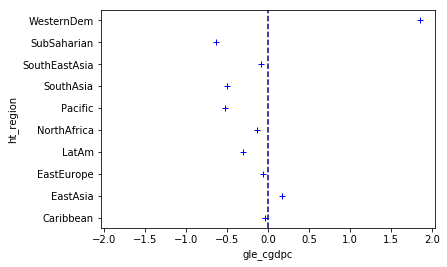

In [12]:
#limit = dotplot(df_gle_sorted_nonan, 'gle_cgdpc', 'ht_region', 'mean')
#limit = dotplot(df_gle_sorted_nonan, 'gle_cgdpc', 'ht_region', 'median')
limit = dotplot(df_gle_sorted_nonan, 'gle_cgdpc', 'ht_region', 'zscore')
plt.xlim(-limit*1.1,limit*1.1)

### 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad
El método debe contener los siguientes argumentos:
- df1 : Tabla de datos 1.
- df2 : Tabla de datos 2.
- variable : Variable a contrastar.
- log : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .

Grafique las curvas para imf_pop , gle_cgdpc y undp_hdi . ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

In [23]:
from scipy.stats import norm

def plot_two_densities(df1, df2, variable, log=False):
    rows = 1
    columns = 3
    plt.figure(figsize=(30,8))
    
    #Eliminación de NaN
    df1_variable_dropna = df1[variable].dropna()
    df2_variable_dropna = df2[variable].dropna()
    
    #Cálculo de estadísticos, media y varianza
    df1_mu = df1_variable_dropna.mean()
    df1_sigma = df1_variable_dropna.var()
    
    df2_mu = df2_variable_dropna.mean()
    df2_sigma = df2_variable_dropna.dropna().var()
    
    #if graph == 'histogram'
    plt.subplot(rows,columns,1)  #subplot: n° filas, n° columnas, gráfico que quiero usar!
    plt.title("Histograma",fontsize='xx-large')
    plt.xlabel(variable,fontsize='xx-large')
    plt.ylabel("Frecuencia",fontsize='xx-large')

    plt.hist(df1_variable_dropna, color = 'lightgrey')
    plt.hist(df2_variable_dropna, alpha=0.4, color = 'khaki')
    plt.axvline(df1_mu, lw=3, color='dimgrey', linestyle='--')
    plt.axvline(df2_mu, lw=3, color='orange', linestyle='--')
    plt.text(df1_mu*0.8, 10, f'$df1: \mu={round(df1_mu,3)}, \sigma={round(df1_sigma,3)}$',fontsize='xx-large')
    plt.text(df2_mu*0.85, 15, f'$df2: \mu={round(df2_mu,3)}, \sigma={round(df2_sigma,3)}$',fontsize='xx-large')
    
    #if graph == 'normal'  #Transformación de df1 y df2 a distribución Normal
    plt.subplot(rows,columns,2)  #subplot: n° filas, n° columnas, gráfico que quiero usar!
    plt.title("Histograma Normal",fontsize='xx-large')
    plt.xlabel(variable,fontsize='xx-large')
    plt.ylabel("Frecuencia",fontsize='xx-large')

    df1_simulate_normal = np.random.normal(df1_mu, np.sqrt(df1_sigma), 1000)
    plt.hist(df1_simulate_normal, color='tomato', alpha=0.4)
    df2_simulate_normal = np.random.normal(df2_mu, np.sqrt(df2_sigma), 1000)
    plt.hist(df2_simulate_normal, color='orangered', alpha=0.4)
    df_min, df_max = plt.xlim()
    print(df_min, df_max)

    
    #Curva Gaussiana para comparación 
    x_axis = np.linspace(df_min,df_max,10000)  #array simulado, en los rangos obtenidos y las mismas veces
    x_axis = np.linspace(df_min,df_max,1000)  #array simulado, en los rangos obtenidos y las mismas veces
    simulate_normal_pdf = norm.pdf(x_axis, df1_mu, np.sqrt(df1_sigma))# Probability Distribution Function (pdf)
    #plt.plot(x_axis, simulate_normal_pdf*df_max*100, color='tomato', lw=3)
    plt.plot(x_axis, simulate_normal_pdf*df_max*100, color='tomato', lw=3)
    

    #Transformación logarítmica
    plt.subplot(rows,columns,3)
    plt.title("Histograma log",fontsize='xx-large')
    plt.xlabel("log ("+variable+")",fontsize='xx-large')
    plt.ylabel("Frecuencia", fontsize='xx-large')

    plt.hist(np.log(df1_variable_dropna))
  

-163.7711424609611 226.6944776443461


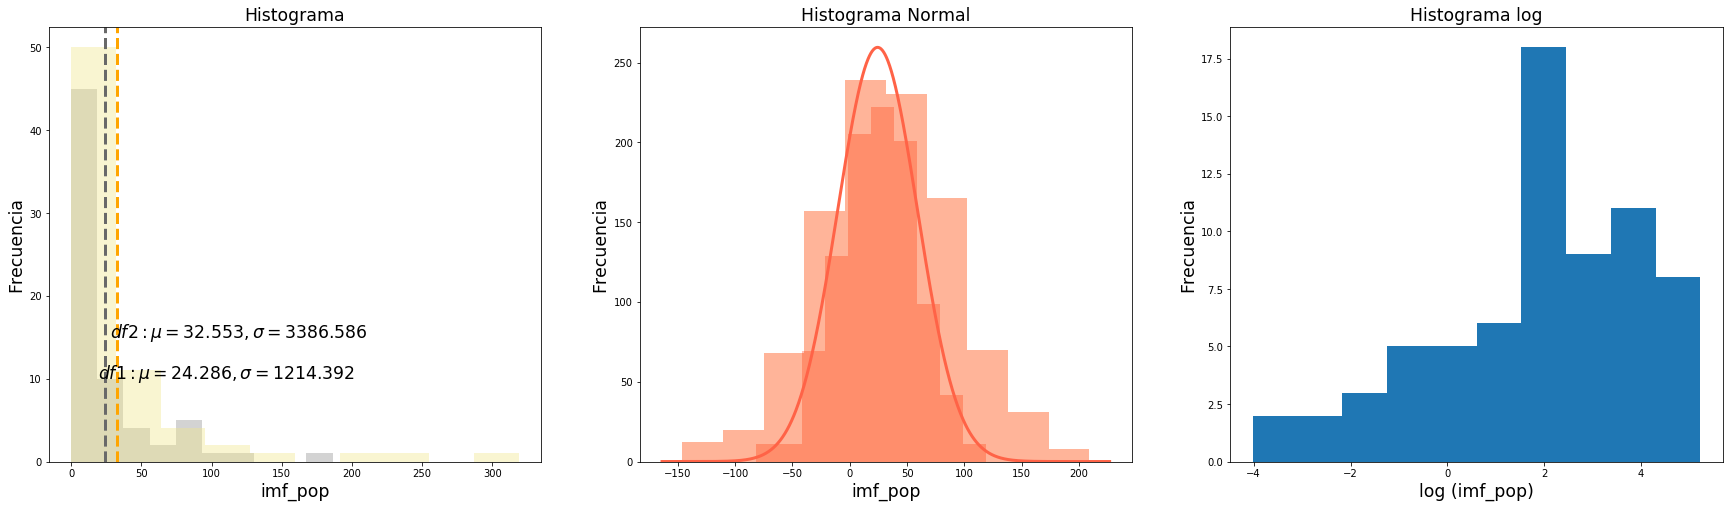

In [24]:
df1 = pd.read_csv('subsample_ale_demo.csv')
df2 = pd.read_csv('subsample_hz_demo.csv')

plot_two_densities(df1, df2, 'imf_pop', True)

-50812.76856660069 91708.46072123789


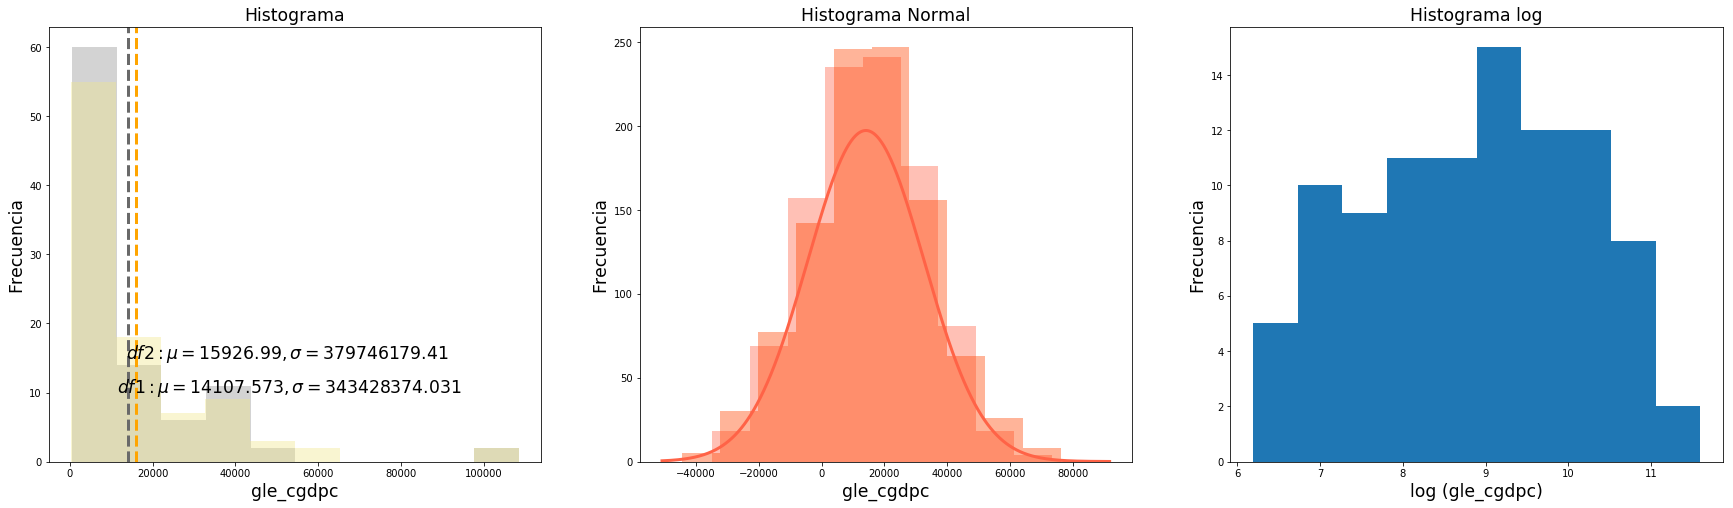

In [13]:
plot_two_densities(df1, df2, 'gle_cgdpc', True)

0.12534515048362627 1.2727813137759925


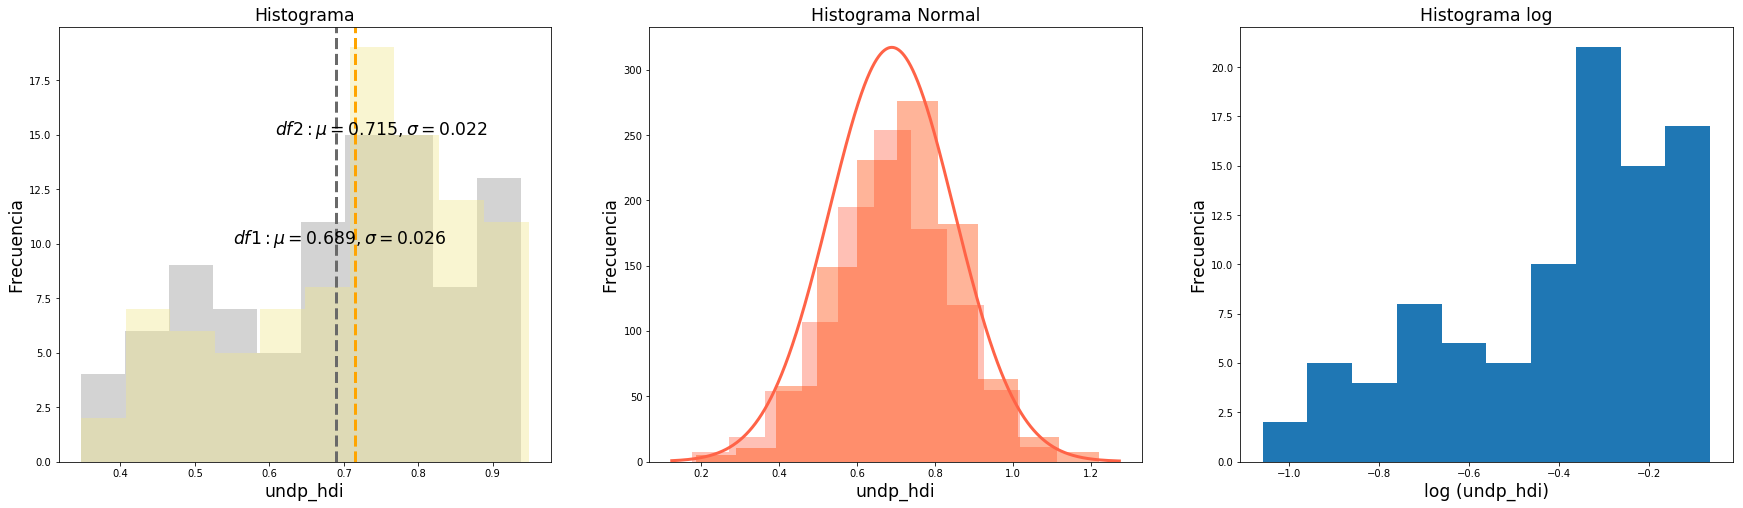

In [14]:
plot_two_densities(df1, df2, 'undp_hdi', True)